In [25]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [21]:
model_path = "./save_models/MLP_MNIST.pth"
device = "cuda"
model = torch.load(model_path, weights_only=False, map_location=torch.device(device))

In [ ]:
def generate_image(model):
    new_image = torch.zeros(1, 28*28).to(device)
    mask = torch.ones_like(new_image, dtype=torch.int).to(device)
    for i in range(28*28):
        logits = model(new_image, mask)
        probs = F.softmax(logits)
        sample = torch.multinomial(probs)

        new_image[0][i] = sample
    return new_image

In [ ]:
new_image = generate_image(model).to("cpu")
new_image

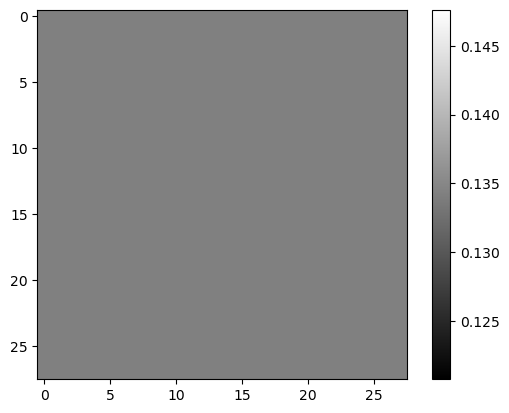

In [23]:
plt.imshow(new_image[0].reshape(28,28).detach().numpy(), cmap="gray")
plt.colorbar()  # 显示颜色条
plt.show()

In [26]:
import torch
import torch.nn.functional as F

# 假设你有一个大小为 (batch_size, num_classes) 的 logits 张量
logits = torch.randn(3, 5)  # 3 个样本，5 个类别

# 使用 softmax 获取概率分布
probs = F.softmax(logits, dim=-1)  # 对每行（每个样本）进行 softmax

print("Probabilities:", probs)

# 从 softmax 之后的概率中采样
# 这里从每个样本中采样 1 个类别，dim=-1 表示按最后一维进行采样（类别维度）
samples = torch.multinomial(probs, 1)

print("Sampled indices:", samples)

Probabilities: tensor([[0.1841, 0.3049, 0.0337, 0.4055, 0.0717],
        [0.2159, 0.4198, 0.0337, 0.2424, 0.0882],
        [0.5305, 0.0322, 0.0464, 0.2646, 0.1262]])
Sampled indices: tensor([[3],
        [1],
        [0]])
